In [1]:
# default_exp data
%load_ext nb_black
# nb_black if running in jupyter
# lab_black
%load_ext autoreload
# automatically reload python modules if there are changes in the
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
# hide
from nbdev.showdoc import *

<IPython.core.display.Javascript object>

# Data

> You should begin your work by cleaning up your data and possibly defining tools for doing it repeateadly.



***input***: raw data

***output***: clean and tidy dataset for ML model / simulation / analytics + toy dataset for testing

***description:***

This is the first notebook of your machine learning project. In this notebook, you will load the data, inspect, clean and make it tidy. 
You will define the data points and their features and labels. The output of this notebook is a clean, tidy dataset ready for analysis and machine learning.
You can also do a basic statistical analysis of the data to better understand it.
For any functions you define for handling the data, remember to mark their cells with `# export` -comment,
so that they will be included in the data.py-module build based on this notebook.
You can also include unit tests for your own functions.

## Import relevant modules

Import python modules you need for handling the data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import nan as Nan
import pandas as pd
from sklearn import datasets

# from pandas.api.types import CategoricalDtype

<IPython.core.display.Javascript object>

## Define notebook parameters

Define input, output and additional parameters of this notebook, the information needed for running the notebook.
In your own project, you can do this step in the later iterations of the work,
when you know what is required.
In this cell, only assing values to variables directly: `variable_name = value`.
**Do not derive any information in this cell as it will mess up the parameterization** - do it in the cell below.

The cell below has the tag 'parameters' - this is for the notebook parameterization tool 'papermill'
that allows you execute complete notebooks as python functions.
The values you define here will become the default values of the parameterized notebook, but you can also run the notebook with completely different setup.
More on this in the `workflow` notebook.

In [4]:
# This cell is tagged with 'parameters'

output_clean_file = "data/preprocessed_data/dataset_clean_all_classes.csv"

output_toy_file = "data/preprocessed_data/dataset_toy_all_classes.csv"

output_input_sample_file = "data/preprocessed_data/input_file.csv"

seed = 0

<IPython.core.display.Javascript object>

Now we can define any immediate derivative operations, righ below the parameters cell:

In [5]:
# set seed
np.random.seed(seed)

<IPython.core.display.Javascript object>

## Load the data

We are using a csv-file exported from database of Helsinki City library system. We could also load the data straight from database or from online resources, if needed and possible. Please note, that you should not add your datasets to git, as it is not intended for data version control and tracking large datafiles exceed the limits of it. The 'data'-folder of this template is ignored by git.

In [6]:
#
# Read the raw data of library volumes. The fields are separated by commas.
#

df_raw_data = pd.read_csv("data/raw_data/sample4.csv")

<IPython.core.display.Javascript object>

## Describe the data

The database uses so called MARC-system. There are multiple rows for each volume(=item). The file consists of three columns:

id (id of the Volume that is item e.g. a book)
content (the metadata belonging to this volume)
marc_tag (specifies what the value of the 'content'-field in this row means), for example:
marc_tag '650' means that content field holds a keyword
marc_tag '095' means that content field holds Helsinki-classification

In [7]:
df_raw_data.shape

(820271, 7)

<IPython.core.display.Javascript object>

In [8]:
# view the data
df_raw_data.head()

,record_id,084,092,093,094,095,650
0,420907795010,NaN,NaN,NaN,NaN,180.2,NaN
1,420907795011,NaN,NaN,NaN,1.4,NaN,NaN
2,420907795013,NaN,NaN,NaN,1.4,NaN,NaN
3,420907795014,NaN,NaN,NaN,NaN,1.791,NaN
4,420907795016,NaN,1.4,NaN,1.4,NaN,NaN


<IPython.core.display.Javascript object>

In [9]:
df_raw_data.info()

# An example in dataset 'Sample4.csv, where there is no HKI-CLASS.
# Instead the row has 084- and 092 Classes and some keywords

print("\n\nNO HKI CLASS:\n", df_raw_data.loc[df_raw_data["record_id"] == 420907796975])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820271 entries, 0 to 820270
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   record_id  820271 non-null  int64 
 1   084        271200 non-null  object
 2   092        428182 non-null  object
 3   093        157261 non-null  object
 4   094        422208 non-null  object
 5   095        552728 non-null  object
 6   650        664145 non-null  object
dtypes: int64(1), object(6)
memory usage: 43.8+ MB


NO HKI CLASS:
         record_id    084    092  093    094  095  \
875  420907796975  68.25  68.25  NaN  68.25  NaN   

                                                   650  
875  ruokaohjeet,ruokaperinne,ruokakulttuuri,arktin...  


<IPython.core.display.Javascript object>

Ok, so there are 13 features and one label (the last column in our dataset) in the data. Let's construct these into dataframe column names.


## Clean the data and make it tidy

For analytics & ML purposes, we should make the data tidy. This means that

 1. Every column is a variable (feature or label)
 2. Every row is an observation (data point).
 3. Every cell is a single value (int, float, cathegorical, str, but no nested structures like lists or dictionaries)


 - Our **features** consist of keywords and different classifications. Marc_tags for this features are:
   - 084 = PLC - Finnish Public Libraries Classification System (YKL)
   - 092 = City of Espoo classification
   - 093 = City of Kauniainen classification
   - 094 = City of Vantaa classification
   - 650 = Keyword (subject/index term/concept)
 - Our **label** is Helsinki City Library Classification System and we call it HCLCS (HKLJ) (095 in raw data).
 - Our **datapoint** is a library item (book, cd, dvd...) identified by id column in raw data.
 
~~First we get only those rows that contain keywords (marc_tag = 650).~~

Filtering the data.


In [10]:
#
# Get only those rows that has ykl- and hklj-classes
#

# Filter out items which are fiction (095-class is 1.4) and empty 095-class rows. 084-class can be null.
df1 = df_raw_data[:]
df1 = df1[
    (
        #(df_raw_data["084"].notnull()) & # If want to filter out empty 084-class rows.
        (df_raw_data["095"].notnull()) &
        (df_raw_data["095"] != "1.4")
    )
]
# Have to change dtype to Object (from float64) because null values can't be splitted
df1["084"] = df1["084"].astype(str)


# There could be several 084-values for the datarows. Select first ones.
df1.loc[:, ("084")] = df1["084"].apply(lambda x: x.split(",")[0])


<IPython.core.display.Javascript object>

In [11]:
# Fixer function which scrapes "real" part from broken string.
# I.e. broken: '59.562209'  -> fixed '59.5622',
#      broken: '59.562109*' -> fixed '59.562',
#      broken: '89.41038'   -> fixed '89.41'


def fix_class(wrong_value, notations):
    # take the first value. cell could contain multiple values
    wrong_value = wrong_value.split(",")[0]
    found = False
    try:
        for index, char in enumerate(wrong_value):
            if char == ".":  # no need to test decimal point -value
                continue
            slice_of_test_value = len(wrong_value) - (index + 1)
            test_value = str(wrong_value[0:slice_of_test_value])
            if test_value in notations:
                return test_value
    except Exception as e:
        print("wrong value: ", wrong_value, " e: ", e)
        pass
    return np.nan

<IPython.core.display.Javascript object>

In [12]:
# Function which removes "form tags" ("muotoluokka") from string.
# I.e. broken: '89.41038' -> fixed '89.41'
#      broken: '59.562209' -> fixed '59.5622'
#      broken: '74.92063' -> fixed '74.92'
#      broken: '07.109' -> fixed '' CHECK THIS!
#      broken: '02.6063' -> fixed '' CHECK THIS!

import re


def remove_form_tags(wrong_value, tags):
    for tag in tags:
        # print(tag)
        pattern = tag + "(?!.*" + tag + ")"
        s = re.search(pattern, wrong_value)
        if s:
            position = s.start()

            # remove '.' if it the last character
            if wrong_value[position - 1] == ".":
                korjaus = wrong_value[: s.start() - 1]
            else:
                korjaus = wrong_value[: s.start()]

            # Check if returning empty string (which is not intended)
            # if korjaus == "":
            #   print(wrong_value + " -> " + korjaus)

            return korjaus
    return np.nan

<IPython.core.display.Javascript object>

In [13]:
# Trim (remove spaces) string values of all feature columns (084, 092, 093, 094 and 095)

df_obj = df1.select_dtypes(["object"])
df1[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

<IPython.core.display.Javascript object>

In [14]:
# YKL hierarchy
df_ykl = pd.read_csv(
    "data/raw_data/ykl_simple.csv",
    dtype={"notation": str, "prefLabel": str},
)

# YKL form tags
df_ykl_ml = pd.read_csv(
    "data/raw_data/ykl_ml.csv",
    dtype={"notation": str, "prefLabel": str},
)

# Read notations (unique 084-classes) into list
notations = df_ykl["notation"]

# NaNs are valid "correct" values in this syntax -> append it to notations Series
notations = notations.append(pd.Series([Nan], index=[2384]))
"""
0            0
1           00
2         00.1
3       00.109
4         00.2
         ...  
2361     99.28
2362     99.29
2363      99.3
2364     99.31
2384       NaN
Length: 2366, dtype: object
"""

# Convert Series to list
notations = notations.values.tolist()
# notations: ['0', '00', '00.1', '00.109', '00.2', '00.4' ... '99.3', '99.31', nan]

# Select preferred columns for cleaning purposes(084, 092, 093 and 094)
columns = list(df1)[1:-2]
# columns: ['084', '092', '093', '094']

form_tags = df_ykl_ml["notation"].values.tolist()  # .wrap(width=10)  # .str.join(",")
tags = form_tags
# tags: ['01', '02', '03', '04', '05', '06', '07', '08', '09', '038', '051', '052', '053', '054', '062', '063', '064', '065', '081']

# Create regex pattern for class-value to test if class is 'form tag'
pattern = "(?:\d{2}\.\d*"
form_tags = "|".join([pattern + "{}$)".format(value) for value in form_tags])
"""
form_tags: 
(?:\d{2}\.\d*01$)|(?:\d{2}\.\d*02$)|(?:\d{2}\.\d*03$)|(?:\d{2}\.\d*04$)|
(?:\d{2}\.\d*05$)|(?:\d{2}\.\d*06$)|(?:\d{2}\.\d*07$)|(?:\d{2}\.\d*08$)|
(?:\d{2}\.\d*09$)|(?:\d{2}\.\d*038$)|(?:\d{2}\.\d*051$)|(?:\d{2}\.\d*052$)|
(?:\d{2}\.\d*053$)|(?:\d{2}\.\d*054$)|(?:\d{2}\.\d*062$)|(?:\d{2}\.\d*063$)|
(?:\d{2}\.\d*064$)|(?:\d{2}\.\d*065$)|(?:\d{2}\.\d*081$)
"""

# Iterate over selected columns (084, 092, 093 and 094)
for i in columns:
    df_split1A = df1[df1[i].isin(notations)] # rows with correct notations (classes)
    df_split1B = df1[~df1[i].isin(notations)] # rows with wrong values
    df_split2 = df_split1B[df_split1B[i].str.fullmatch(form_tags)] # rows from wrong value set which fully matches to the correct form tags

    # Remove "form tags"
    df_split2.loc[:, (i)] = df_split2.apply(
        lambda x: remove_form_tags(x[i], tags), axis=1
    )
    
    # Recheck current column values (084/092/093/094-column) again because form tags have been trimmed of at the previous phase
    df_split3A = df_split2[df_split2[i].isin(notations)] # rows with correct notations (classes)
    df_split3B = df_split2[~df_split2[i].isin(notations)] # rows with wrong values

    # Fix the remaining ones
    df_split3B.loc[:, (i)] = df_split3B.apply(
        lambda x: fix_class(x[i], notations), axis=1
    )

    # Merge splitted data
    df1 = pd.concat([df_split1A, df_split3A, df_split3B], axis=0)


/anaconda/envs/ml-sami-libclas/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<IPython.core.display.Javascript object>

In [15]:
# Read HKLJ classes from csv-file
df_hklj = pd.read_csv(
    "data/raw_data/hklj_simple.csv",
    dtype={"notation": str, "prefLabel": str},
)

# Read HKLJ form tags from csv-file
df_hklj_ml = pd.read_csv(
    "data/raw_data/hklj_ml.csv",
    dtype={"notation": str, "prefLabel": str},
)

# Read notations (unique 084-classes) into list
notations = df_hklj["notation"]
"""
notations: 
0          000
1          001
2       001.09
3        001.1
4        001.2
         ...  
2053       999
2054     999.1
Name: notation, Length: 2055, dtype: object         
"""

# NaNs are valid "correct" values in this syntax -> append it to notations Series
# notations = notations.append(pd.Series([Nan], index=[2232]))
notations = notations.append(pd.Series([Nan], index=[2055]))

# Convert Series to list
notations = notations.values.tolist()
# notations: ['000', '001', '001.09', '001.1', '001.2', '002' ... '999.1', nan]

# form_tags = df_hklj_ml["notation"].str.cat(sep="|")
form_tags = df_hklj_ml["notation"].values.tolist()
# form_tags: ['03', '05', '09', '081', '083', '084']
tags = form_tags
# tags: ['03', '05', '09', '081', '083', '084']

# Create regex pattern for class-value to test if class is 'form tag'
pattern = "(?:\d{3}\.\d*"
form_tags = "|".join([pattern + "{}$)".format(value) for value in form_tags])
# form_tags: (?:\d{3}\.\d*03$)|(?:\d{3}\.\d*05$)|(?:\d{3}\.\d*09$)|(?:\d{3}\.\d*081$)|(?:\d{3}\.\d*083$)|(?:\d{3}\.\d*084$)

# Split data to separate dataframes
df_split1A = df1[df1["095"].isin(notations)] # rows with correct notations (classes)
df_split1B = df1[~df1["095"].isin(notations)] # rows with wrong values
df_split2 = df_split1B[df_split1B["095"].str.fullmatch(form_tags)] # rows from wrong value set which fully matches to the correct form tags

# Remove "form tags"
df_split2.loc[:, ("095")] = df_split2.apply(
    lambda x: remove_form_tags(x["095"], tags), axis=1
)

# Recheck yklj-values (095-column) again because form tags have been trimmed of at the previous phase
df_split3A = df_split2[df_split2["095"].isin(notations)] # rows with correct notations (classes)
df_split3B = df_split2[~df_split2["095"].isin(notations)] # rows with wrong values

# Fix the remaining ones
df_split3B.loc[:, ("095")] = df_split3B.apply(
    lambda x: fix_class(x["095"], notations), axis=1
)

# Merge splitted data
df1 = pd.concat([df_split1A, df_split3A, df_split3B], axis=0)


<IPython.core.display.Javascript object>

In [16]:
# Copy dataframe
df2 = df1[:]

# Filter out rows which has empty strings (=""). You can do it by using astype(bool)-method.
df2 = df2[df2["084"].astype(bool)]

# Filter again null values
# df2 = df2[((df2["084"].notnull()) & (df2["095"].notnull()))]
df2 = df2[df2["095"].notnull()]

# Write dataframe to csv-file
df2.to_csv("data_output.csv")

<IPython.core.display.Javascript object>

In [17]:
# Create schema and validate values against that schema.

import pandas_schema
from pandas_schema import Column, Schema
from pandas_schema.validation import (
    CustomElementValidation,
    LeadingWhitespaceValidation,
    TrailingWhitespaceValidation,
    CanConvertValidation,
    MatchesPatternValidation,
    InRangeValidation,
    InListValidation,
)

null_validation = [
    CustomElementValidation(lambda d: d is not np.nan, "this field cannot be null")
]

schema = Schema(
    [
        Column("record_id", null_validation),
        Column(
            "084",
            [
                LeadingWhitespaceValidation(),
                TrailingWhitespaceValidation(),
                MatchesPatternValidation(r"^(?:\S)|\d{1,2}(?:$|.\d{0,}$)"),
            ],
        ),
        Column("092", [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
        Column("093", [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
        Column("094", [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
        Column("095", [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
        Column("650", [LeadingWhitespaceValidation(), TrailingWhitespaceValidation()]),
    ]
)

errors = schema.validate(df2)

# Count of validation errors
print('Count of errors:', len(errors))

# Print first 15 validation errros
for error in errors[:15]:
    print(error)


Count of errors: 0


<IPython.core.display.Javascript object>

In [18]:
#
# Build a small example input file: this can be used for testing and as an example for end users.
# Drop the rows from training dataset and use them as example input file.
# You can vary the size of input by MIN_TRAINING_SET (setting this bigger reduces the size of example input file)
# or by MAX_INPUT_SIZE (sets the maximum limit for example input file)
#

MIN_TRAINING_SET = (
    100  # take to example input file only rows that match a decent training set
)
MAX_INPUT_SIZE = 2000  # Dont make a bigeer example input file than this
input_classes_df = pd.DataFrame()
all_hkl_classes = df2["095"].unique()

print(df2.shape)
print(len(all_hkl_classes))

# LOOP THROUGH ALL HKL CLASSES
for hkl_class_str in all_hkl_classes:
    # print(str(i) + ": " + hkl_class_str)

    # stop if example input file already large enough
    if len(input_classes_df) >= MAX_INPUT_SIZE:
        break

    # take only those rows that have at least one feature class and a label class
    matching_rows = df2.loc[
        (
            df2["084"].notnull()
            | df2["093"].notnull()
            | df2["092"].notnull()
            | df2["094"].notnull()
        )
        & (df2["095"] == hkl_class_str)
    ]
    matching_rows = df2.loc[df2["093"].notnull() & (df2["095"] == hkl_class_str)]

    # skip if not enough training material for this row
    if len(matching_rows) < MIN_TRAINING_SET:
        continue

    # insert selected row into exampe file and drop it from training set
    row = matching_rows.sample(1)
    record_id = row.iloc[0]["record_id"]
    input_classes_df = input_classes_df.append(row)
    df2 = df2.drop(df2.index[df2["record_id"] == record_id])

# print results
print(df2.shape)
print(input_classes_df.shape)
display(input_classes_df.head(20))

(110331, 7)
1786
(110303, 7)
(28, 7)


,record_id,084,092,093,094,095,650
309509,420908459931,67.451,67.451,67.451,67.451,654.91,"koira,koulutus,käyttäytyminen,lemmikkieläimet"
370076,420908603653,99.1,99.1,99.1,99.1,990.1,"barndom,krigstid,depression,coping,alkoholism,..."
415094,420908697168,65,65,65,65,798,"askartelu,lapset,uusiotuotteet,ekologisuus,kie..."
771024,420909224089,99.139,99.139,92.73,99.139,928.1,"sotilaat,taistelut,sotatoimet,sotarintama,talv..."
746969,420909199309,79.81,79.81,79.81,79.81,798.2,NaN
707772,420909155148,78.8922,78.8922,78.8922,NaN,788.21,NaN
508871,420908851879,78.8942,78.8942,78.8942,78.8942,788.41,"popmusiikki,laulelmat"
310733,420908462782,78.8911,78.8911,78.8911,NaN,788.33,rock
23505,420907850892,78.3112,78.3112,78.3112,78.3112,788.6,"lastenlaulut,hengelliset laulut"
509468,420908852805,78.8921,78.8921,78.8921,78.8911,788.11,"rock,blues"


<IPython.core.display.Javascript object>

The amount of library items and classes is big (hundreds of thousands items and thousands of classes). To limit the problem we make the following assumptions:
 - We always know the YKL-classification of the new library item that we want classify with HKL-classification sytem.
 - Training/validation set can and needs only contain rows that match the YKL-classification of the new library item.
 
Thus we pick only those rows that match the YKL-class of the new library item. In the first implementation we just select a random YKL-class. However, the training/validation dataset can still be quite big. You can restrict the size of the dataset even more by setting the variable MAX_TRAININGSET_SIZE below appropriately.

In [19]:
# Read all distinct keywoards into an array

keywords = []

for index, row in df2.iterrows():
    try:
        kwords = row["650"].split(",")
    except Exception as e:
        kwords = None
    if kwords:
        for k in kwords:
            if k not in keywords:
                keywords.append(k)

print("---")
print(len(keywords))

---
31101


<IPython.core.display.Javascript object>

## Visualize the data

Once the dataset looks clean, it is time to visualize it.
Visualization is probably the most powerful tool of data science.

Visualization depends highly on the data, but usually you should begin by looking at two things: distribution and correlation.

Let's make histograms of the variables, and a trellis of scatterplots for visualizing correlations.

In [20]:
# export

# ^(this cell is exported to ml_project_template/ml_project_template/data.py)
# you could also define another module to export to.
# however, all modules that you export to, must have a notebook with the same name and header!

# function for drawing histograms of a dataframe
import matplotlib.pyplot as plt
import pandas as pd


def plot_histogram(df):
    """
    Plot histograms of a dataframe
    """
    n_cols = len(df.columns)
    col_names = df.columns.values
    fig, axs = plt.subplots(
        1, n_cols, figsize=(3 * n_cols, 3), constrained_layout=True, sharey="row"
    )
    for i in range(n_cols):
        ax = axs[i]
        col_name = col_names[i]
        x = df[col_name]
        # print(x)
        x.plot(ax=ax, kind="hist")
        xmin, xmax = min(x), max(x)
        # print("***")
    # print("xxxx")
    for i in range(n_cols):  # to have equal tick lines in each plot
        ax = axs[i]
        col_name = col_names[i]
        x = df[col_name]
        xmin, xmax = min(x), max(x)
        ax.hlines(
            y=axs[df.apply(lambda x: x.max()).argmin()].get_yticks()[
                1:-1
            ],  # select ticks from the fig with smallest max value
            xmin=xmin,
            xmax=xmax,
            colors="white",
            alpha=1,
            linewidth=2,
        )
        ax.set_xlabel(col_name)
        ax.set_title(f"{i})", loc="left")
        ax.spines["left"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
    return fig, ax

<IPython.core.display.Javascript object>

Convert objects to float64 and Nans to zeroes.

In [21]:
# Create new dataframe from data for plotting purposes
df3 = df2[:]

# Replace NaN values with zeros
df3 = df3.fillna(0)

# Convert objects to float64 values
for column in df3.columns[1:6]:
    df3[column] = df3[column].astype(np.float64)

<IPython.core.display.Javascript object>

Plot histogram of the data.

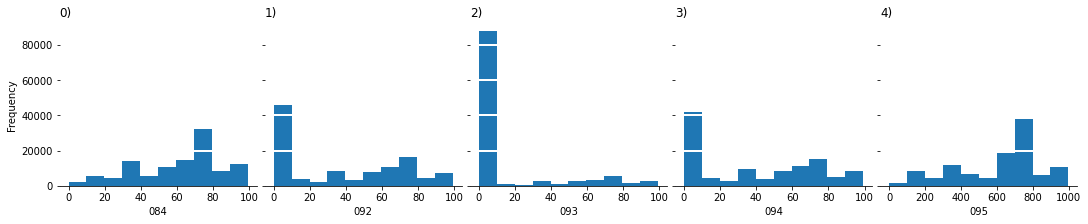

<IPython.core.display.Javascript object>

In [22]:
_ = plot_histogram(df3.iloc[:, 1:6])

The histograms show the distribution of values in different classifications. 095-CLASS (HKLJ-CLASS) is the one that we are trying to predict from other classifications.

Below is the definition of plot_trellis function that comes with ml_project_template. It plots data with three dimensions for all features and label combinations. Let's try it as it is and see if it shows any correlation between different classifications:

NOTE: We also want plot all the features against 095-class (HKLJ_CLASS, the label) and see if they correlate.

In [23]:
# export

# Make a multiple of scatter plots
def plot_trellis(df, legend_title="y", true_label="True", false_label="False"):
    """
    Make a trellis plot of a dataframe against a binary y value in last column
    """
    n_cols = df.shape[1] - 1
    col_names = df.columns.values

    fig, axs = plt.subplots(
        n_cols, n_cols, figsize=(n_cols * 3, n_cols * 3), constrained_layout=True
    )
    for i in range(n_cols):
        for j in range(n_cols):
            ax = axs[i, j]
            if i != j:
                # first plot negative cases
                df[df.iloc[:, -1] == 0].plot(
                    ax=ax,
                    x=col_names[j],
                    y=col_names[i],
                    kind="scatter",
                    color="b",
                    marker="o",
                    alpha=0.5,
                    label=false_label,
                )
                # then positive cases
                df[df.iloc[:, -1] != 0].plot(
                    ax=ax,
                    x=col_names[j],
                    y=col_names[i],
                    kind="scatter",
                    color="r",
                    marker="x",
                    alpha=0.5,
                    label=true_label,
                )
                # Hide the right and top spines
                ax.spines["right"].set_visible(False)
                ax.spines["top"].set_visible(False)
                ax.set_title(f"{i*n_cols+j})", loc="left")
                ax.legend(title=legend_title)
            else:
                ax.annotate(xy=(0, 0.5), text=col_names[i], fontsize=20)
                ax.axis("off")  # hide the box
    return fig, ax

<IPython.core.display.Javascript object>

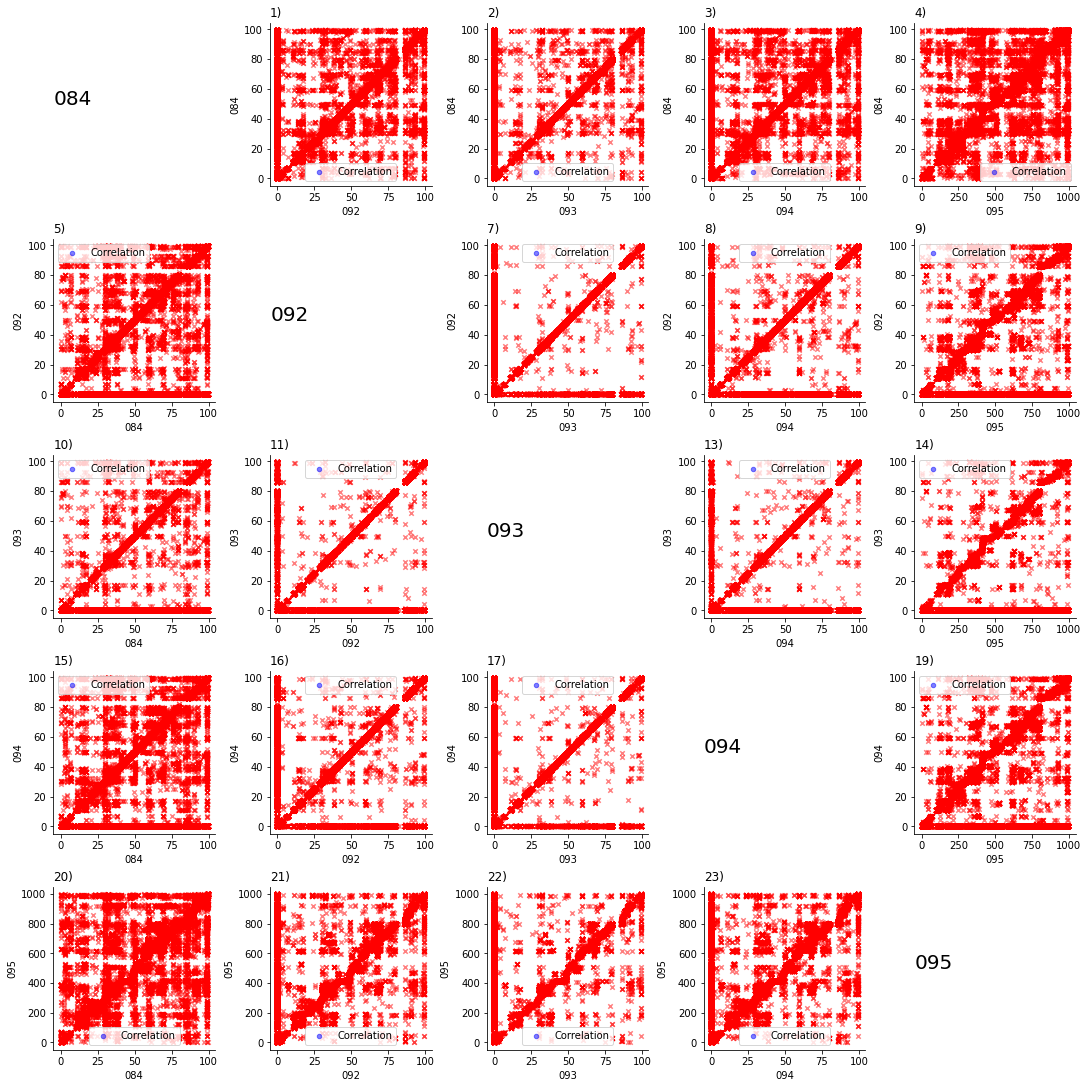

<IPython.core.display.Javascript object>

In [24]:
# Select (=concat) certain columns
features_labels_datapoints = pd.concat([df3.iloc[:, 1:6], df3.iloc[:, 0]], axis=1)

# Plot correlation diagrams
_ = plot_trellis(
    features_labels_datapoints,
    legend_title="",
    true_label="",
    false_label="Correlation",
)

## Some intermediate conclusions based on data visualization

We are mostly interested in science-classifications (how to separate them?).

The trellis plotting of features can probably be interpreted so that there is a very strong correlation between classifications.

NOTE: We can also see that there are some outliers. We should find these values and maybe get rid of them (perhaps replace them with NaN or zero). It is also possible that these outliers are the ones that ML-algorithm classification is of most help with?

 - [Outliers with scikit-learn](http://napitupulu-jon.appspot.com/posts/outliers-ud120.html)
 - [How should outliers be dealt with in linear regression analysis?](https://stats.stackexchange.com/questions/175/how-should-outliers-be-dealt-with-in-linear-regression-analysis)
 - [What is the difference between linearly dependent and linearly correlated?](https://stats.stackexchange.com/questions/31270/what-is-the-difference-between-linearly-dependent-and-linearly-correlated)

## Suffle Dataset

Before saving the dataset for further use, it is a good practice to shuffle it.
This is, of course, assuming the order of the data is not meaningful (as with time series data for example).

Random sampling large datasets consumes time and resources, so if you have a pre-shuffled dataset you can just read in more data that is already randomized.
Also, quite often datasets are intentionally or carelessly saved with some obvious or latent order that might include odd biases to your further analysis.
Shuffling helps you to get rid of these. Shuffling a large dataset may take a while.

In [25]:
# suffle all classes dataset (keywords are not parsed)
all_ykl_classes_df = df2.sample(frac=1).reset_index(
    drop=True
)  # suffle and re-index dataset
print(
    f"ALL YKL_CLASSES DATASET (keywords not parsed and number of rows is {len(all_ykl_classes_df)})"
)
all_ykl_classes_df.head()

ALL YKL_CLASSES DATASET (keywords not parsed and number of rows is 110303)


,record_id,084,092,093,094,095,650
0,420908592837,01.58,01.58,01.58,01.58,010.6,"lastenkirjallisuus,nuortenkirjallisuus,sarjaki..."
1,420908048112,79.31,79.31,79.31,79.31,796.1,"jalkapallo,historia,urheilijat,jalkapalloilija..."
2,420908835280,23,NaN,NaN,23,239,"apologetiikka,kristinusko,usko,Jumala"
3,420909109168,59.43,NaN,NaN,59.43,615.1,"farmakokinetiikka,farmakodynamiikka,lääkeainee..."
4,420908679914,66.4,66.4,NaN,NaN,668,"rakennukset,valvontajärjestelmät,kiinteistöt,v..."


<IPython.core.display.Javascript object>

In [26]:
# suffle input example dataset (keywords are not parsed)
input_classes_df = input_classes_df.sample(frac=1).reset_index(
    drop=True
)  # suffle and re-index dataset
print(
    f"EXAMPLE INPUT DATASET (keywords not parsed and number of rows is {len(input_classes_df)})"
)
input_classes_df.head()

EXAMPLE INPUT DATASET (keywords not parsed and number of rows is 28)


,record_id,084,092,093,094,095,650
0,420908943150,86.22,86.22,86.22,86.22,821.1,"personhistoria,biografisk litteraturvetenskap,..."
1,420909061903,59.34,68.22,68.22,68.22,691.12,"joulu,ruokaohjeet,kasvisruoat,gluteeniton ruok..."
2,420909016138,68.2,68.2,68.2,68.2,691.1,"matrecept,matlagning,hälsosamhet,mat,superfood"
3,420908852805,78.8921,78.8921,78.8921,78.8911,788.11,"rock,blues"
4,420908697168,65,65,65,65,798,"askartelu,lapset,uusiotuotteet,ekologisuus,kie..."


<IPython.core.display.Javascript object>

## Save clean and tidy data for further use

In [27]:
# save the dataset to output path defined in the beginning of this notebook
all_ykl_classes_df.to_csv(output_clean_file)
input_classes_df.to_csv(output_input_sample_file)

<IPython.core.display.Javascript object>

## Create small toy dataset for developing and testing the ML methods

Best way to test your ML methods in development is with data as close to the real data as possible.
However, to save you from frustratingly long runtimes in development, it is better to create a small sample dataset.
You can also create unit tests with this sample dataset.

In [28]:
# create sample of the dataset with all classes
n_toy_all_classes = 500  # number of samples
n_toy_all_classes = min(all_ykl_classes_df.shape[0], n_toy_all_classes)

# toy_df = (
#    one_ykl_class_df.groupby("record_id", group_keys=False)
#    .apply(
#        lambda x: x.sample(int(np.rint(n_toy * x.shape[0] / one_ykl_class_df.shape[0])))
#    )
#    .sample(frac=1)
#    .reset_index(drop=True)
# )

# alternatively:
toy_df_all_classes = all_ykl_classes_df.sample(
    frac=n_toy_all_classes / all_ykl_classes_df.shape[0]
)  # if simple stratification is not applicable
# toy_df = df.iloc[:n_toy,:] # with time series data. consider the size of n_toy


print(f"\n*****")
print(
    f"Toy dataset size (ALL YKL CLASSES): {toy_df_all_classes.shape[0]} rows and {toy_df_all_classes.shape[1]} columns"
)
print(f"*****\n")
toy_df_all_classes.head()


*****
Toy dataset size (ALL YKL CLASSES): 500 rows and 7 columns
*****



,record_id,084,092,093,094,095,650
4601,420908822165,78.8911,78.8911,NaN,78.8911,788.33,rock
98805,420908631171,99.1,99.1,99.1,99.1,990.1,"suomalaiset,taidemaalarit"
22333,420907981954,78.462,NaN,NaN,NaN,784.142,perinnemusiikki
2969,420908153948,69.3,69.3,NaN,69.3,675.8,"markkinointitutkimus,markkinointi,tietojärjest..."
59116,420908158377,68.2,NaN,NaN,68.2,691.1,"ruokaohjeet,ruoanvalmistus,pula-ajat"


<IPython.core.display.Javascript object>

In [29]:
# save toy dataset
toy_df_all_classes.to_csv(output_toy_file)
print(output_toy_file)

data/preprocessed_data/dataset_toy_all_classes.csv


<IPython.core.display.Javascript object>

## You can now move on to the model notebook!